GRPC Camera Client

In [105]:
from proto.cameraservice import cameraservice_pb2 
from proto.cameraservice import cameraservice_pb2_grpc
import logging
from io import BytesIO 
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import grpc
import logging
from PIL import Image

In [106]:
VIDEO_ADDRESSE = 'webcamservice.sallyhardware.svc.cluster.local:50051'

class CameraClient():
    
    def __init__(self):
        try:
            self.channel = grpc.insecure_channel(VIDEO_ADDRESSE) 
            self.stub = cameraservice_pb2_grpc.HardwareControllerStub(self.channel) 
            logging.info("Connection to camera service established")
        except:
            logging.error("Impossible to rpc connect to the camera service")

    def take_picture(self):
        request = cameraservice_pb2.PictureConfig(data_format=cameraservice_pb2.DataFormat.BMP)
        result_generator = self.stub.TakePicture(request)
        img_data = BytesIO()
        # get data in chunks  
        for res in result_generator:        
            img_data.write(res.data) 
        # transfrom and display an image 
        img_data.seek(0)    
        img_data_arr = np.array(Image.open(img_data))
        
        return img_data_arr

Dot center (12.097838452787258, 15.04778156996587)


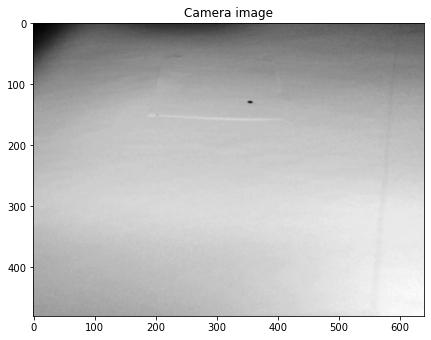

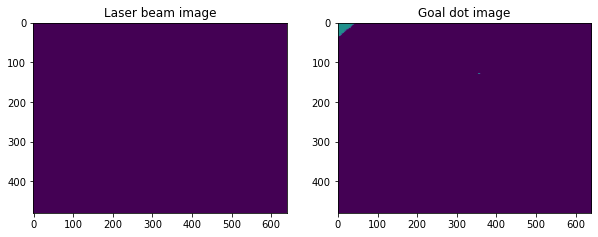

In [251]:
import matplotlib.pyplot as plt
import scipy
from skimage.measure import label, regionprops
import skimage.filters as skfilt
THRESH_DOT = 20
cam = CameraClient()
arr = cam.take_picture()
img = arr[:,:,0]

# -- plot initial image
plt.figure(figsize=(7,7))
plt.title("Camera image")
plt.imshow(img, cmap='gray')
  
# -- smooth and find a threshold
#thresh_val = skfilt.threshold_otsu(img)
dot_mask = img < THRESH_DOT
#print(thresh_val)
#img = scipy.ndimage.gaussian_filter(img, sigma=1)
laser_mask = img > 210

# -- label image regions
label_laser = label(laser_mask)
label_dot = label(dot_mask)
 
# -- plot labeled images 
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))
ax1.set_title("Laser beam image")
ax1.imshow(label_laser)
ax2.set_title("Goal dot image")
ax2.imshow(label_dot)

props_laser = regionprops(label_laser)
props_dot = regionprops(label_dot)
#print(f'Laser center {props_laser[0].centroid}')
print(f'Dot center {props_dot[0].centroid}')